# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
# !pip install kaggle

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [4]:
# !ls -l ~/.kaggle
# !cat ~/.kaggle/kaggle.json

In [5]:
# ! kaggle competitions files home-credit-default-risk

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [6]:
# DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
# #DATA_DIR = os.path.join('./ddddd/')
# !mkdir $BASE_DIR

In [7]:
# !ls $DATA_DIR

In [8]:
# ! kaggle competitions download home-credit-default-risk -p $DATA_DIR

### Imports

In [9]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings

import re
from time import time
from scipy import stats
import json

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [10]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [11]:
# os.chdir('/content/gdrive/My Drive/Final project')
# DATA_DIR = "/content/gdrive/My Drive/Final project/datasets" 

In [12]:
#this cell is required if using Kaggle API to download the data

# unzippingReq = False
# if unzippingReq: #please modify this code 
#     zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()
#     zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
#     zip_ref.extractall('datasets')
#     zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](attachment:image.png)

### Application train

In [18]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train.csv'
datasets[ds_name] = pd.read_csv('application_train')

datasets['application_train'].shape

FileNotFoundError: File b'application_train' does not exist

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [ ]:
ds_name = 'application_test'
datasets[ds_name] = load_data(ds_name)

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")
for ds_name in ds_names:
    datasets[ds_name] = load_data(ds_name)

In [ ]:
for ds_name in ds_names:
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

# Exploratory Data Analysis

## Summary of Application train

In [ ]:
datasets["application_train"].info()

In [ ]:
datasets["application_train"].describe()

## Missing data for application train

In [ ]:
total = datasets["application_train"].isnull().sum().sort_values(ascending = False)
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
missing_application_train_data.head(20)

## Features having missing percent <= 25%

In [ ]:
missing_application_train_data[missing_application_train_data.Percent <= 25]

## Distribution of the target column 

In [ ]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Correlation with  the target column 

In [ ]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Out of the three strongest numerical features, **EXT_SOURCE_1** has more than 50% missing value. So we will try the option of only using the other two.

In [ ]:
datasets['application_train'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()/datasets['application_train'].shape[0]

In [ ]:
datasets['application_train'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

## Applicants Age 

In [ ]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## FLAG_OWN_REALTY

In [ ]:
datasets['application_train']['FLAG_OWN_REALTY'].value_counts()

It seems like there is no big difference in default ratios between male and female.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['FLAG_OWN_REALTY'], hue=datasets['application_train']['TARGET'])
plt.show()

Is owning real estate a good predictor of credit risk? First let's look at the default rate among those who own real estate:

In [ ]:
datasets['application_train'].loc[(datasets['application_train']['FLAG_OWN_REALTY'] == 'Y') & (datasets['application_train']['TARGET'] == 1), 
         ].shape[0]/datasets['application_train'].loc[datasets['application_train']['FLAG_OWN_REALTY'] == 'Y', ].shape[0]

And now among those who do not own real estate:

In [ ]:
datasets['application_train'].loc[(datasets['application_train']['FLAG_OWN_REALTY'] == 'N') & (datasets['application_train']['TARGET'] == 1), 
         ].shape[0]/datasets['application_train'].loc[datasets['application_train']['FLAG_OWN_REALTY'] == 'N', ].shape[0]

There is a difference, but it's rather subtle.

## REGION_POPULATION_RELATIVE

In [ ]:
datasets['application_train'].REGION_POPULATION_RELATIVE.value_counts()

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['REGION_POPULATION_RELATIVE'], hue=datasets['application_train']['TARGET'])
plt.show()

We may segment this variable as it clearly seperates the default rate

In [ ]:
def target_1_ratio(df):
  return df[df['TARGET'] == 1].shape[0]/df.shape[0]

region_pop_relative = datasets['application_train'].groupby('REGION_POPULATION_RELATIVE').apply(target_1_ratio).to_frame()
region_pop_relative.columns = ['target_1_ratio']
region_pop_relative.reset_index(inplace=True)
region_pop_relative.sort_values(['target_1_ratio'], inplace=True)
region_pop_relative

It will require some work to find the best 'cut' to bin the **REGION_POPULATION_RELATIVE** feature, so we will just divide the variable into three bins: [0, 0.07), [0.07, 0.1)] and [0.1, 1] and create a new feature in the feature engineering section.

## FLAG_EMP_PHONE

**FLAG_EMP_PHONE** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['FLAG_EMP_PHONE'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('FLAG_EMP_PHONE').apply(target_1_ratio).to_frame()

## FLAG_WORK_PHONE

**FLAG_WORK_PHONE** seems to have some separating power. So we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['FLAG_WORK_PHONE'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('FLAG_WORK_PHONE').apply(target_1_ratio).to_frame()

## REGION_RATING_CLIENT

**REGION_RATING_CLIENT** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['REGION_RATING_CLIENT'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('REGION_RATING_CLIENT').apply(target_1_ratio).to_frame()

## HOUR_APPR_PROCESS_START

It seems like applications in the evening (5pm-9pm) have a lower default rate but the volumne in this time frame is relatively small.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['HOUR_APPR_PROCESS_START'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('HOUR_APPR_PROCESS_START').apply(target_1_ratio).to_frame()

## ORGANIZATION_TYPE

**ORGANIZATION_TYPE** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['ORGANIZATION_TYPE'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('ORGANIZATION_TYPE').apply(target_1_ratio).to_frame()

## FLAG_DOCUMENT_3

**FLAG_DOCUMENT_3** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['FLAG_DOCUMENT_3'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('FLAG_DOCUMENT_3').apply(target_1_ratio).to_frame()

## FONDKAPREMONT_MODE

**FONDKAPREMONT_MODE** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['FONDKAPREMONT_MODE'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('FONDKAPREMONT_MODE').apply(target_1_ratio).to_frame()

## WALLSMATERIAL_MODE

**WALLSMATERIAL_MODE** seems to have some separating power, so we will use this feature.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(datasets['application_train']['WALLSMATERIAL_MODE'], hue=datasets['application_train']['TARGET'])
plt.show()

In [ ]:
datasets['application_train'].groupby('WALLSMATERIAL_MODE').apply(target_1_ratio).to_frame()

## Summary of previous_application

* Explore which column to use for indicating the application days within 24 months/365 days

In [ ]:
datasets['previous_application'].head()

In [ ]:
datasets['previous_application'].shape

* Explore which column to use for indicating the application days within 24 months/365 days

In [ ]:
datasets['previous_application'].columns[datasets['previous_application'].columns.str.contains('DAYS')]

In [ ]:
datasets['previous_application'][['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].head(20)

Looks like we will have to choose *DAYS_DECISION*

In [ ]:
datasets['previous_application'][['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].isnull().sum()/datasets['previous_application'].shape[0]

A small portion of the population had more than 1 applications. We will create a variable **no_prev_appl** to show the no of previous applications from a customer in the past 12 months.

In [ ]:
no_app_customer = datasets['previous_application'].loc[(datasets['previous_application'].DAYS_DECISION >= -365) & 
           (datasets['previous_application'].NAME_CONTRACT_STATUS != 'Canceled'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
no_app_customer = no_app_customer.to_frame()
no_app_customer.reset_index(inplace=True)
no_app_customer.rename(columns={'SK_ID_PREV':'no_prev_appl'}, inplace=True)
no_app_customer.head()

distribution of no of previous applications within 12 months from bureau data. We will merge this new data 

In [ ]:
plt.hist(no_app_customer.loc[no_app_customer.no_prev_appl <= 10, 'no_prev_appl'], bins=10, edgecolor='black')

plt.show()

Merge *no_app_customer* with train and test data

In [ ]:
train = pd.merge(datasets['application_train'], no_app_customer, on='SK_ID_CURR', how='left')
test = pd.merge(datasets['application_test'], no_app_customer, on='SK_ID_CURR', how='left')

About 53% current applicants don't have any previous applications.

In [ ]:
(train.no_prev_appl.isnull().sum()/train.shape[0], test.no_prev_appl.isnull().sum()/test.shape[0])

now create **no_approved_prev_appl**

In [ ]:
no_approved_app_customer = datasets['previous_application'].loc[(datasets['previous_application'].DAYS_DECISION >= -365) & 
           (datasets['previous_application'].NAME_CONTRACT_STATUS == 'Approved'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
no_approved_app_customer = no_approved_app_customer.to_frame()
no_approved_app_customer.reset_index(inplace=True)
no_approved_app_customer.rename(columns={'SK_ID_PREV':'no_approved_prev_appl'}, inplace=True)
no_approved_app_customer.head()

In [ ]:
plt.hist(no_approved_app_customer.no_approved_prev_appl, bins=10, edgecolor='black')

plt.show()

Merge *no_approved_app_customer* with train and test data

In [ ]:
train = pd.merge(train, no_approved_app_customer, on='SK_ID_CURR', how='left')
test = pd.merge(test, no_approved_app_customer, on='SK_ID_CURR', how='left')

About 60% percent current customers don't have any previous application info.

In [ ]:
train.no_approved_prev_appl.isnull().sum()/train.shape[0]

In [ ]:
test.no_approved_prev_appl.isnull().sum()/test.shape[0]

fill NA for the 2 newly created features

In [ ]:
train[['no_prev_appl']] = train[['no_prev_appl']].fillna(value=0)
test[['no_prev_appl']] = test[['no_prev_appl']].fillna(value=0)
train[['no_approved_prev_appl']] = train[['no_approved_prev_appl']].fillna(0)
test[['no_approved_prev_appl']] = test[['no_approved_prev_appl']].fillna(0)

distribution of the two newly created features

In [ ]:
plt.hist(train.no_approved_prev_appl, bins=20, edgecolor='black')
plt.title('Distribution of No of Approved Previous Applications')

plt.show()

In [ ]:
plt.hist(train.no_prev_appl, bins=20, edgecolor='black')
plt.title('Distribution of No ofPrevious Applications')

plt.show()

One example of a customer having multiple previous applications

In [ ]:
datasets['previous_application'].loc[datasets['previous_application'].SK_ID_CURR == 133023, ['SK_ID_CURR', 'DAYS_DECISION', 'NAME_CONTRACT_STATUS',  
                                                                     'AMT_APPLICATION', 'AMT_CREDIT','CODE_REJECT_REASON']].head(20)

## Summary of bureau.csv

In [ ]:
datasets['bureau'].head()

In [ ]:
datasets['bureau'].shape

Vast majority (99.75%) of customers didn't have any loans that are overdued, so number of times of 30 days over due is not very useful here.

In [ ]:
datasets['bureau'].loc[datasets['bureau'].CREDIT_DAY_OVERDUE == 0, ].shape[0]/datasets['bureau'].shape[0]

In [ ]:
datasets['bureau'].loc[(datasets['bureau'].AMT_CREDIT_MAX_OVERDUE.notnull()) & (datasets['bureau'].DAYS_CREDIT_UPDATE >= -365), ].shape[0]/datasets['bureau'].shape[0]

to create no_active_loans, total_creditLimit and ave_creditLimit

In [ ]:
datasets['bureau'].CREDIT_ACTIVE.value_counts()

Most loans use currency 1 so we will use this currency for credit limit calculation.

In [ ]:
datasets['bureau'].CREDIT_CURRENCY.value_counts()

calculate the total credit limit per customer

In [ ]:
bureau_info = datasets['bureau'][(datasets['bureau'].CREDIT_ACTIVE == 'Active') & (datasets['bureau'].CREDIT_CURRENCY == 'currency 1')
                                ].groupby('SK_ID_CURR').AMT_CREDIT_SUM.sum()
bureau_info = bureau_info.to_frame()
bureau_info.reset_index(inplace=True)
bureau_info.head()

In [ ]:
bureau_info.shape

calculate the total no of loans per customer

In [ ]:
bureau_info_no_loans = datasets['bureau'][(datasets['bureau'].CREDIT_ACTIVE == 'Active') & (datasets['bureau'].CREDIT_CURRENCY == 'currency 1')
                                ].groupby('SK_ID_CURR').SK_ID_BUREAU.count()
bureau_info_no_loans = bureau_info_no_loans.to_frame()
bureau_info_no_loans.reset_index(inplace=True)
bureau_info_no_loans.head()

In [ ]:
bureau_info_no_loans.shape

merge the two data sets

In [ ]:
bureau_info = pd.merge(bureau_info, bureau_info_no_loans, how='outer', on='SK_ID_CURR')
bureau_info.rename(columns={'AMT_CREDIT_SUM':'total_creditLimit', 'SK_ID_BUREAU':'no_of_loans'}, inplace=True)
bureau_info['ave_creditLimit'] = bureau_info.eval('total_creditLimit/no_of_loans')
bureau_info.head()

Merge this dataset with the train and test data set later.

In [ ]:
train = pd.merge(train, bureau_info, on='SK_ID_CURR', how='left')
test = pd.merge(test, bureau_info, on='SK_ID_CURR', how='left')

There is about 29% missing data for the 3 newly created features. 

In [ ]:
(train.total_creditLimit.isnull().sum()/train.shape[0], test.total_creditLimit.isnull().sum()/test.shape[0])

We fill NA with 0.

In [ ]:
train[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']] = train[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].fillna(0)
train[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].head()

In [ ]:
test[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']] = test[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].fillna(0)
test[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].head()

## credit_card_balance.csv

In [ ]:
datasets['credit_card_balance'].head()

we can use *AMT_BALANCE*, *AMT_CREDIT_LIMIT_ACTUAL* and *AMT_PAYMENT_TOTAL_CURRENT* to calculate the total credit limit, utilization and payment ratio.

In [ ]:
datasets['credit_card_balance'].isnull().sum()/datasets['credit_card_balance'].shape[0]

In [ ]:
datasets['credit_card_balance'].NAME_CONTRACT_STATUS.value_counts()

some accounts have 0 credit limit, so we have to exclude them.

In [ ]:
creditCard_info = datasets['credit_card_balance'][(datasets['credit_card_balance'].MONTHS_BALANCE >= -24) & 
                                                  (datasets['credit_card_balance'].NAME_CONTRACT_STATUS =='Active') &
                                                 (datasets['credit_card_balance'].AMT_CREDIT_LIMIT_ACTUAL > 0)].groupby('SK_ID_CURR')['AMT_BALANCE', 
                                                                                 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_PAYMENT_TOTAL_CURRENT'].sum()

some accounts have 0 credit limit, which is strange...

In [ ]:
creditCard_info.reset_index(inplace=True)

In [ ]:
creditCard_info.head()

calculate **utilization_CC** and **payment_ratio_CC**

In [ ]:
creditCard_info['utilization_CC'] = creditCard_info.eval('AMT_BALANCE/AMT_CREDIT_LIMIT_ACTUAL')
creditCard_info['payment_ratio_CC'] = creditCard_info.eval('AMT_PAYMENT_TOTAL_CURRENT/AMT_BALANCE')

set **payment_ratio_CC** to 1 if it is NaN (when there is no unpaid balance).

In [ ]:
creditCard_info.loc[creditCard_info.payment_ratio_CC.isnull(), 'payment_ratio_CC'] = 1
#creditCard_info['payment_ratio_CC'] = creditCard_info['payment_ratio_CC'].fillna(1)

In [ ]:
creditCard_info.isnull().sum()

drop un-necessory columns

In [ ]:
creditCard_info.drop(columns=['AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT'], inplace=True)
creditCard_info.rename(columns={'AMT_CREDIT_LIMIT_ACTUAL':'total_creditLimit_CC'}, inplace=True)

In [ ]:
#ceiling the payment_ratio_CC to 1
creditCard_info.loc[creditCard_info.payment_ratio_CC > 1, 'payment_ratio_CC'] = 1

In [ ]:
creditCard_info.payment_ratio_CC.min()

In [ ]:
train = pd.merge(train, creditCard_info, on='SK_ID_CURR', how='left')
test = pd.merge(test, creditCard_info, on='SK_ID_CURR', how='left')

There are about 75% missing data - 75% customers don't have credit card with Home Credit Group.

In [ ]:
train.total_creditLimit_CC.isnull().sum()/train.shape[0]

We need to decide the strategy for imputing the missing data - 0 doesn't seem to be a good choice here. We will leave this problem for hyperparameter tuning in grid serach step.

## Summary of install_payment.csv

In [ ]:
datasets['installments_payments'].head()

In [ ]:
datasets['installments_payments']['days_past_due'] = datasets['installments_payments'].eval('DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT')
datasets['installments_payments']['past_due_times'] = (datasets['installments_payments']['days_past_due'] > 0 ).astype(int)

In [ ]:
past_due_info = datasets['installments_payments'][datasets['installments_payments']['DAYS_INSTALMENT'] >= -730].groupby('SK_ID_CURR')['past_due_times'].sum() 
past_due_info = past_due_info.to_frame()
past_due_info.reset_index(inplace=True)

About 36% customers had past due events in the past 2 years.

In [ ]:
past_due_info[past_due_info['past_due_times'] > 0].shape[0]/past_due_info.shape[0]

In [ ]:
past_due_info.head()

merge with the main data sets

In [ ]:
train = pd.merge(train, past_due_info, on='SK_ID_CURR', how='left')
test = pd.merge(test, past_due_info, on='SK_ID_CURR', how='left')

About 18% missing data here. We will leave the imputation to gridsearch step.

In [ ]:
train.past_due_times.isnull().sum()/train.shape[0]

# Feature Engineering

## Features created in the EDA step

In [ ]:
train.columns[-9:]

Based on domain knowledge, we have created the following new features from the files other than the two application data sets:


1. total_creditLimit: from bureau.csv, all the credit limits of all the active accounts for a customer;
2. ave_creditLimit: from bureau.csv, average credit limits of all the active accounts for a customer;
3. no_of_loans: from bureau.csv, total number of active loans for a customer;
4. total_creditLimit_CC: from credit_card_balance.csv, total credit limit of all the active credit cards for a customer;
5. utilization_CC: from credit_card_balance.csv, average ratio of total balance to total credit limit for all active accounts for a customer in the past 12 months;
6. payment_ratio_CC: from credit_card_balance.csv, to calculate the average ratio of total payment to total balance in the past 12 months;
7. past_due_flag: from install_payment.csv,  the number of times the customer paid the installment loans after the due date in the past 24 months;
8. no_prev_appl: from previous_application.csv,  no of previous applications in the past 12 months .
9. no_of_approved_prev_appl: from previous_application.csv, no of approved previous applications in the past 12 months.

Check the corelation between the newly created features and the target variable:
* utilization_CC is a very strong feature;
* past_due_times, no_of_loans and no_prev_appl may also help.

In [ ]:
train[['TARGET', 'no_prev_appl', 'no_approved_prev_appl', 'total_creditLimit',
       'no_of_loans', 'ave_creditLimit', 'total_creditLimit_CC',
       'utilization_CC', 'payment_ratio_CC', 'past_due_times']].corr()['TARGET'].sort_values()

## Develop More New Features using pipeline 

develop some more new features:
* credit_income_ratio
* annuity_income_ratio
* REGION_POPULATION_RELATIVE_FLAG

In [ ]:
train['credit_income_ratio'] = train.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
train['annuity_income_ratio'] = train.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio

test['credit_income_ratio'] = test.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
test['annuity_income_ratio'] = test.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio


# Processing pipeline

In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

In [ ]:
# Identify the numeric features we wish to consider. 
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              

    

In [ ]:
list(datasets["application_train"].columns)

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

# just selected a few features for a baseline experiment
selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
X_train= datasets["application_train"][selected_features]
y_train = datasets["application_train"]['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= datasets["application_test"][selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression(n_jobs = -1))
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


In [ ]:
# baseline_scores = cross_val_score(model, X_train, y_train, scoring = 'roc_auc', cv=30)

In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
cv = cv = KFold(n_splits=5, random_state=42, shuffle=False)
logit_scores = cross_val_score(fit_pipeline, app_train_subset, train_labels, cv=cv)
log_reg_pred = fit_pipeline.predict_proba(test)[:, 1]
logit_score_train = logit_scores.mean()
results.loc[0] = ["Baseline", pct(logit_score_train),"Untuned LogisticRegression"]
results

In [ ]:
exp_name = f"Baseline_{len(selected_features)}"

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Benchmark Model

## Set up a pipeline that incorporates feature engineering

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self, features = None): # no *args or **kargs  , features=None
        self.features = features
#         pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
#         df = pd.DataFrame(columns = None)
        df = X.copy()
        df['credit_income_ratio'] = df.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
        df['annuity_income_ratio'] = df.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio        
        
        return df        
    

In [ ]:
# # Identify the numeric features we wish to consider. 

num_attribs = ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'no_prev_appl', 'no_approved_prev_appl','utilization_CC',
               'past_due_times', 'OWN_CAR_AGE', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
               'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','credit_income_ratio', 'annuity_income_ratio']


num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE',
              'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
              'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


# feature_eng = Pipeline([
#     ('feature_eng', Feature_engineering())
# ])


# num_cat_pipeline = ColumnTransformer([
#     ('num_pipeline', num_pipeline, num_attribs),
#     ('cat_pipeline', cat_pipeline, cat_attribs),
# ], remainder = 'drop' )


# data_prep_pipeline = Pipeline([
#     ('feature_eng', feature_eng),
#     ('num_cat_pipe', num_cat_pipeline)        
# ])    

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])






In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

# just selected a few features for a baseline experiment
selected_features = num_attribs + cat_attribs
X_train= train[selected_features]
y_train = train['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

## Logistic Regression Model

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

In [ ]:
%%time 
np.random.seed(42)

full_pipeline_with_predictor = Pipeline([
("preparation", data_prep_pipeline),
("feature_selector", SelectKBest(score_func=f_classif, k=25)),
("polynomial", PolynomialFeatures(degree=2)),
("classifier", LogisticRegression(random_state=42))
])

model_benchmark = full_pipeline_with_predictor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model_benchmark.predict(X_train)), 3)

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_benchmark.predict_proba(X_train)[:, 1])

In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_benchmark.predict(X_train)), 
                accuracy_score(y_valid, model_benchmark.predict(X_valid)),
                accuracy_score(y_test, model_benchmark.predict(X_test)),
                roc_auc_score(y_train, model_benchmark.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_benchmark.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_benchmark.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## submission preperation

In [ ]:
test_class_scores = model_benchmark.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Logistic Regression Model

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
def pct(x):
    return round(100*x,3)

class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self, features = None): # no *args or **kargs  , features=None
        self.features = features
#         pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
#         df = pd.DataFrame(columns = None)
        df = X.copy()
        df['credit_income_ratio'] = df.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
        df['annuity_income_ratio'] = df.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio        
        df['REGION_POPULATION_RELATIVE_flag'] = 0
        df.loc[(df['REGION_POPULATION_RELATIVE'] >= 0.07) & (df['REGION_POPULATION_RELATIVE'] < 0.1), 'REGION_POPULATION_RELATIVE_flag'] = 1  
        df.loc[df['REGION_POPULATION_RELATIVE'] >= 0.1, 'REGION_POPULATION_RELATIVE_flag'] = 2     
        return df        
    

In [ ]:
# Identify the numeric features we wish to consider. 
num_attribs = ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'no_prev_appl', 'no_approved_prev_appl','utilization_CC',
               'past_due_times', 'OWN_CAR_AGE', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
               'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','credit_income_ratio', 'annuity_income_ratio']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('polynomial', PolynomialFeatures(degree=2)), 
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE', 
              'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
              'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


feature_eng = Pipeline([
    ('feature_eng', Feature_engineering())
])


num_cat_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_pipeline', cat_pipeline, cat_attribs),
], remainder = 'drop' )


data_prep_pipeline = Pipeline([
    ('feature_eng', feature_eng),
    ('num_cat_pipe', num_cat_pipeline)        
])    


# data_prep_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", num_pipeline),
#         ("cat_pipeline", cat_pipeline),
#     ])

#set up reporting format
results = pd.DataFrame(columns=["Classifier", "Cross fold train AUC", "test AUC", "Train Time(s)", 
                                "Test Time(s)", "Experiment description"])

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

# just selected a few features for a baseline experiment
selected_features = num_attribs + cat_attribs
X_train= train[selected_features]
y_train = train['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
# print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# A Function to execute the grid search and record the results.
def ConductGridSearch_LogisticRegression(X_train, y_train, X_test, y_test, i=0, prefix=''):
    
    i += 1
    # generate the pipeline
    full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("classifier", LogisticRegression(random_state=42))
    ])

    params = {'classifier__penalty': ('l1', 'l2'),
        'classifier__C': (10, 1, 0.1, 0.01),
    }

    grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=10, verbose=1, n_jobs=2)
    grid_search.fit(X_train, y_train)

    # Best estimator score
    best_train_score = np.round(grid_search.best_score_, 3)

    # Best estimator fitting time
    start = time()
    grid_search.best_estimator_.fit(X_train, y_train)
    train_time = round(time() - start, 4)

    # Best estimator prediction time
    start = time()
    best_test_score = np.round(grid_search.best_estimator_.score(X_test, y_test), 3)
    test_time = round(time() - start, 4)

    # Collect the best parameters found by the grid search
    print("Best Parameters:")
    best_parameters = {}
    best_parameters['penalty'] = grid_search.best_estimator_.get_params()['classifier__penalty']
    best_parameters['C'] = grid_search.best_estimator_.get_params()['classifier__C']  
    param_dump = []
    param_dump.append(best_parameters)
    print("\t"+"best parameters: " + str(best_parameters))
    print("****** FINISH",prefix," *****")
    print("")

    # Record the results
    results.loc[i] = [prefix, best_train_score, best_test_score,  train_time, test_time, json.dumps(param_dump)]

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import PolynomialFeatures

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# # A Function to execute the grid search and record the results.
# def ConductGridSearch_LogisticRegression(X_train, y_train, X_test, y_test, i=0, prefix=''):
#    # Create a list of classifiers for our grid search experiment
#     feature_selector = [
#         ('SelectKbest', SelectKBest(score_func=f_classif)),
#         ('pca', PCA()),
#     ]

#     # Arrange grid search parameters for each feature selector
#     params_grid = {
#         'SelectKbest': {
#             'k': [15, 25, 35], 
#         },
#         'pca': {'n_components': [10, 20],
#         },
#     }
    
#     for (name, selector) in feature_selector:
#         i += 1
#         # Print classifier and parameters
#         print('****** START',prefix, name,'*****')
#         parameters = params_grid[name]
#         print("Parameters:")

#         for p in sorted(parameters.keys()):
#             print("\t"+str(p)+": "+ str(parameters[p]))

#         # generate the pipeline
#         full_pipeline_with_predictor = Pipeline([
#         ("preparation", data_prep_pipeline),
#         ("feature_selector", selector),
#         ("polynomial", PolynomialFeatures()),
#         ("classifier", LogisticRegression(random_state=42))
#         ])
        
#         # Execute the grid search
#         params = {}
#         for p in parameters.keys():
#             pipe_key = 'feature_selector__'+str(p)
#             params[pipe_key] = parameters[p] 
        
#         params.update({'polynomial__degree': (1, 2),
#             'classifier__penalty': ('l1', 'l2'),
#             'classifier__C': (10, 1, 0.1, 0.01),
#         })

#         grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=10, verbose=1, n_jobs=2)
#         grid_search.fit(X_train, y_train)
                
#         # Best estimator score
#         best_train_score = pct(grid_search.best_score_)

#         # Best estimator fitting time
#         start = time()
#         grid_search.best_estimator_.fit(X_train, y_train)
#         train_time = round(time() - start, 4)

#         # Best estimator prediction time
#         start = time()
#         best_test_score = pct(grid_search.best_estimator_.score(X_test, y_test))
#         test_time = round(time() - start, 4)
        
#         # Collect the best parameters found by the grid search
#         print("Best Parameters:")
#         best_parameters = grid_search.best_estimator_.get_params()
#         param_dump = []
#         for param_name in sorted(params.keys()):
#             param_dump.append((param_name, best_parameters[param_name]))
#             print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
#         print("****** FINISH",prefix,name," *****")
#         print("")
        
#         # Record the results
#         results.loc[i] = [prefix+name, best_train_score, best_test_score,  train_time, test_time, json.dumps(param_dump)]

In [ ]:
%%time
# This might take a while
ConductGridSearch_LogisticRegression(X_train, y_train, X_valid, y_valid, 0, "Logistic Regression ")

In [ ]:
results

In [ ]:
%%time 
np.random.seed(42)

full_pipeline_with_predictor = Pipeline([
("preparation", data_prep_pipeline),
("classifier", LogisticRegression(penalty='l1', C=1, random_state=42))
])

model_bestLogisticRegression = full_pipeline_with_predictor.fit(X_train, y_train)

In [ ]:
from scipy import stats

best_train_scores = cross_val_score(model_bestLogisticRegression, X_train, y_train, 
                                   scoring='roc_auc', cv=30)

In [ ]:
best_train_scores

In [ ]:
baseline_scores

In [ ]:
(t_score, p_value) = stats.ttest_rel(baseline_scores, best_train_scores)
p_value

# Dataset loading, feature engineering and pre-processing

In [145]:
import gc
from sklearn.externals import joblib
import math
import numpy as np
import os
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, roc_auc_score
from statistics import mean
import timeit
import uuid

def load_data(name):
    in_path = os.path.join(DATA_DIR, f'{name}.csv')
    df = pd.read_csv(in_path)
    return df

def get_datasets(phase):
    datasets = {}
    datasets["application"] = load_data(f"application_{phase}")
    print(f"loaded {len(datasets['application'])} records from application_{phase}")
    ds_names = ("bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")
    for ds_name in ds_names:
        datasets[ds_name] = load_data(ds_name)
        print(f"loaded {len(datasets[ds_name])} records from {ds_name}")
    return datasets

In [146]:
def features_from_previous_application(X, datasets):
    '''
    creates the no_prev_appl and no_approved_prev_appl columns
    '''
    prev_app = datasets['previous_application']
    no_app_customer = prev_app.loc[(prev_app.DAYS_DECISION >= -365) & 
           (prev_app.NAME_CONTRACT_STATUS != 'Canceled'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
    no_app_customer = no_app_customer.to_frame()
    no_app_customer.reset_index(inplace=True)
    no_app_customer.rename(columns={'SK_ID_PREV':'no_prev_appl'}, inplace=True)
    
    no_approved_app_customer = prev_app.loc[(prev_app.DAYS_DECISION >= -365) & 
           (prev_app.NAME_CONTRACT_STATUS == 'Approved'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
    no_approved_app_customer = no_approved_app_customer.to_frame()
    no_approved_app_customer.reset_index(inplace=True)
    no_approved_app_customer.rename(columns={'SK_ID_PREV':'no_approved_prev_appl'}, inplace=True)
    
    X = pd.merge(X, no_app_customer, on='SK_ID_CURR', how='left')
    X = pd.merge(X, no_approved_app_customer, on='SK_ID_CURR', how='left')
    X[['no_prev_appl']] = X[['no_prev_appl']].fillna(value=0)
    X[['no_approved_prev_appl']] = X[['no_approved_prev_appl']].fillna(0)
    
    return X

def features_from_bureau(X, datasets):
    '''
    Engineered features:
    - total_creditLimit
    - no_of_loans 
    - ave_creditLimit
    '''
    bureau = datasets['bureau']
    credit_sum = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_CURRENCY == 'currency 1')] \
        .groupby('SK_ID_CURR').AMT_CREDIT_SUM.sum()
    credit_sum = credit_sum.to_frame()
    credit_sum.reset_index(inplace=True)
    
    no_loans = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_CURRENCY == 'currency 1')] \
        .groupby('SK_ID_CURR').SK_ID_BUREAU.count()
    no_loans = no_loans.to_frame()
    no_loans.reset_index(inplace=True)
    
    bureau_info = pd.merge(credit_sum, no_loans, how='outer', on='SK_ID_CURR')
    bureau_info.rename(columns={'AMT_CREDIT_SUM':'total_creditLimit', 'SK_ID_BUREAU':'no_of_loans'}, inplace=True)
    bureau_info['ave_creditLimit'] = bureau_info.eval('total_creditLimit/no_of_loans')

    X = pd.merge(X, bureau_info, on='SK_ID_CURR', how='left')
    X[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']] = X[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].fillna(0)

    return X

def features_from_credit_card_balance(X, datasets):
    '''
    Engineered features:
    - utilization_CC
    - payment_ratio_CC
    - total_credit_limit_CC
    '''
    ccb = datasets['credit_card_balance']
    creditCard_info = ccb[(ccb.MONTHS_BALANCE >= -24) & 
                          (ccb.NAME_CONTRACT_STATUS =='Active') &
                          (ccb.AMT_CREDIT_LIMIT_ACTUAL > 0)] \
                    .groupby('SK_ID_CURR')['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_PAYMENT_TOTAL_CURRENT'].sum()
    creditCard_info.reset_index(inplace=True)
    
    creditCard_info['utilization_CC'] = creditCard_info.eval('AMT_BALANCE/AMT_CREDIT_LIMIT_ACTUAL')
    creditCard_info['payment_ratio_CC'] = creditCard_info.eval('AMT_PAYMENT_TOTAL_CURRENT/AMT_BALANCE')
    creditCard_info.loc[creditCard_info.payment_ratio_CC.isnull(), 'payment_ratio_CC'] = 1
    creditCard_info.loc[creditCard_info.payment_ratio_CC > 1, 'payment_ratio_CC'] = 1
    creditCard_info.drop(columns=['AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT'], inplace=True)
    creditCard_info.rename(columns={'AMT_CREDIT_LIMIT_ACTUAL':'total_creditLimit_CC'}, inplace=True)
    
    X = pd.merge(X, creditCard_info, on='SK_ID_CURR', how='left')
    return X # best fillna strategy will be left to grid search

def features_from_installments_payments(X, datasets):
    '''
    Engineered features:
    - past_due_times
    '''
    ip = datasets['installments_payments']
    ip['past_due_times'] = (ip.eval('DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT') > 0).astype(int)
    past_due_info = ip[ip['DAYS_INSTALMENT'] >= -730].groupby('SK_ID_CURR')['past_due_times'].sum() 
    past_due_info = past_due_info.to_frame()
    past_due_info.reset_index(inplace=True)

    X = pd.merge(X, past_due_info, on='SK_ID_CURR', how='left')
    return X

def features_from_application(X):
    '''
    Engineered features:
    - credit_income_ratio
    - annuity_income_ratio
    - REGION_POPULATION_RELATIVE_flag
    '''
    X['credit_income_ratio'] = X.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
    X['annuity_income_ratio'] = X.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio
    X['REGION_POPULATION_RELATIVE_flag'] = 0
    X.loc[(X['REGION_POPULATION_RELATIVE'] >= 0.07) & (X['REGION_POPULATION_RELATIVE'] < 0.1), 'REGION_POPULATION_RELATIVE_flag'] = 1  
    X.loc[X['REGION_POPULATION_RELATIVE'] >= 0.1, 'REGION_POPULATION_RELATIVE_flag'] = 2
    return X
    
def build_features(datasets):
    print("features from previous application")
    X = features_from_previous_application(datasets['application'], datasets)
    print("features from bureau")
    X = features_from_bureau(X, datasets)
    print("features from credit card balance")
    X = features_from_credit_card_balance(X, datasets)
    print("features from installments")
    X = features_from_installments_payments(X, datasets)
    print("features from application")
    X = features_from_application(X)
    return X

## Build up a pipeline incoporating feature engineering

In [147]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
    
    
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, features = None): # no *args or **kargs  , features=None
        self.features = features

    def get_feature_names(self):
        return self.df.columns.tolist()
        
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X):
        self.df = X.copy()    
        return build_features(self.df)    

In [156]:
from sklearn.model_selection import train_test_split


# Identify the numerical features we wish to consider.
num_attribs = ['EXT_SOURCE_2','EXT_SOURCE_3', 'no_prev_appl', 'no_approved_prev_appl','utilization_CC', 'past_due_times', 'OWN_CAR_AGE', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','DAYS_EMPLOYED','credit_income_ratio', 'annuity_income_ratio']

# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE_flag', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']


num_pipeline = Pipeline([
#         ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
#         ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='constant')),  # most_frequent
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


feature_eng_pipeline = Pipeline([
    ('feature_eng', FeatureEngineering())
])


num_cat_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_pipeline', cat_pipeline, cat_attribs),
], remainder = 'drop' )


data_prep_pipeline = Pipeline([
#     ('feature_eng_pipe', feature_eng_pipeline),
    ('num_cat_pipe', num_cat_pipeline)        
])    



## Data loading and pre-processing

In [6]:
config_file = os.path.join(os.getcwd(), "workingdir.config")
with open(config_file, 'r') as f:
    WORKING_DIR = f.readline()
    DATA_DIR = os.path.join(WORKING_DIR, 'Data')
    LOG_DIR = os.path.join(WORKING_DIR, 'runs')

# Data loading and feature engineering    
datasets_train = get_datasets(phase = 'train')
X = feature_eng_pipeline.transform(datasets_train)
y = datasets_train['application']['TARGET']

datasets_test = get_datasets(phase = 'test')
X_kaggle_test = feature_eng_pipeline.transform(datasets_test)



loaded 307511 records from application_train
loaded 1716428 records from bureau
loaded 27299925 records from bureau_balance
loaded 3840312 records from credit_card_balance
loaded 13605401 records from installments_payments
loaded 1670214 records from previous_application
loaded 10001358 records from POS_CASH_balance
features from previous application
features from bureau
features from credit card balance
features from installments
features from application
loaded 48744 records from application_test
loaded 1716428 records from bureau
loaded 27299925 records from bureau_balance
loaded 3840312 records from credit_card_balance
loaded 13605401 records from installments_payments
loaded 1670214 records from previous_application
loaded 10001358 records from POS_CASH_balance
features from previous application
features from bureau
features from credit card balance
features from installments
features from application


In [7]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 134)
X validation      shape: (46127, 134)
X test            shape: (39208, 134)
X X_kaggle_test   shape: (48744, 133)


## A set of functions for reporting

In [61]:
import csv

def logIt(models, experiemnt = None, test_description = None):
    """
    Extract and record information from trained models
    param:
    - models: trained models in a list.
    - experiemnt:
    - test_description:
    return: record metrics to runs.csv document
    """
    
    for model, description in zip(models, test_description):
        model_attribs = []
        model_attribs.append(experiemnt)   
        model_attribs.append(description)
        model_attribs.append(model.get_params()['estimator__preparation__cat_pipeline__selector__attribute_names'])
        model_attribs.append(model.get_params()['estimator__preparation__num_pipeline__selector__attribute_names'])
        model_attribs.append([(model.get_params()['estimator__preparation__num_pipeline__steps']), (model.get_params()['estimator__preparation__cat_pipeline__steps'])] )
        model_attribs.append(repr(model)[:repr(model).find(r"(")])
        model_attribs.append(model.param_distributions)
        model_attribs.append(model.best_params_)
        model_attribs.append(round(mean(model.cv_results_['mean_fit_time']), 5))
        model_attribs.append(round(model.best_score_, 5))
        model_attribs.append(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 5))
        model_attribs.append(round(accuracy_score(y_test, model.predict(X_test)), 5))
        model_attribs.append('')
        model_attribs.append(str(uuid.uuid4()))
        # append to runs.csv
        with open("runs.csv",'a') as resultFile:
            wr = csv.writer(resultFile, dialect='excel')
            wr.writerow(model_attribs)
    print(f"All models have been successfully recorded!")

In [64]:
from sklearn.metrics import roc_auc_score, accuracy_score

def printIt(models, model_names = None, append = False):
    """
    Extract and print information from trained models
    param 
    - models: trained models in a list.
    - append: Boolean
    return: print experiment log 
    """
    global expLog
    
    if not append: 
        expLog = pd.DataFrame(columns=["exp_name", 
                                           "Train Acc", 
                                           "Valid Acc",
                                           "Test  Acc",
                                           "Train AUC", 
                                           "Valid AUC",
                                           "Test  AUC"
                                          ])
  
    for model, model_name in zip(models, model_names) :    
        
            
        try:
            expLog
        except NameError:
            expLog = pd.DataFrame(columns=["exp_name", 
                                           "Train Acc", 
                                           "Valid Acc",
                                           "Test  Acc",
                                           "Train AUC", 
                                           "Valid AUC",
                                           "Test  AUC"
                                          ])
            
        if not 'DS_Store' in model_name: 
            expLog.loc[len(expLog)] = [f"{model_name.replace('.pkl', '')}"] + list(np.round(
                           [accuracy_score(y_train, model.predict(X_train)), 
                            accuracy_score(y_valid, model.predict(X_valid)),
                            accuracy_score(y_test, model.predict(X_test)),
                            roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                            roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                            roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
                4)) 
    return expLog



In [146]:
def plotIt(models):
    """
    Extract and plot information from trained models
    param:
    - models: trained models in a list.
    return: train/validation loss plots
    """
    pass

def compareIt(models, model_names, baseline_model, X_train, y_train, X_test, y_test):
    """
    Extract and compare information from trained models
    param:
    - models: trained models in a list.
    return: T-test statitics with p values
    """
    
    # statistic table 
    results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test accuracy", "t-statistic", "p-value" ])
    
    # baseline model
    cv_scores_baseline = cross_val_score(baseline_model, X_train, y_train, scoring="roc_auc", cv=10, verbose = 0)
    best_train_score_baseline = cv_scores_baseline.mean()
    best_test_score_baseline = baseline_model.score(X_test, y_test)
    
    # trained models
    for model, model_name in zip(models, model_names):
        cv_scores = cross_val_score(model.best_estimator_, X_train, y_train, scoring="roc_auc", cv=10, verbose = 0)
        (t_stat, p_value) = stats.ttest_rel(cv_scores_baseline, cv_scores)
        best_train_score = cv_scores.mean()
        best_test_score = model.best_estimator_.score(X_test, y_test)

        # Record the results
        results.loc[0] = ["Baseline", best_train_score_baseline, best_test_score_baseline,  "---", "---"]
        
        results.loc[len(results)] = [model_name.replace('.pkl', ''), best_train_score, best_test_score, round(t_stat, 5),  round(p_value,5)]
        print(model_name)
    
    return results   

# Random Forest Model

## Hyperparamter tuning and feature selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()

pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest", RandomForestClassifier())  # iterations=100,learning_rate=0.03,
    ], memory=None)


params = {
    'RandomForest__n_estimators': list(range(300)),
    'RandomForest__min_samples_split': list(range(2,10)),
    'RandomForest__max_depth': list(range(5,50))
}


model_rf = RandomizedSearchCV(pipeline, params, 
                              n_iter=15, cv = 5, 
                              scoring='roc_auc', 
                              random_state=42, verbose=2, 
                              n_jobs=-1)



In [ ]:
model_rf.fit(X_train, y_train)
from sklearn.externals import joblib
joblib.dump(model_rf, 'model_rf3.pkl') 

## Evaluation metrics

In [68]:
from sklearn.externals import joblib
from os import listdir

dir = '/Users/DL/Documents/gDrive/Kaggle/trained/rf'
models = []
fnames = sorted([fn for fn in listdir(dir) if not fn.startswith('.')])
for fname in fnames : 
    models.append(joblib.load(os.path.join(dir, fname)))

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserW

In [69]:
printIt(models, model_names = listdir(dir), append = False)

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_14_features,0.9198,0.9192,0.9159,0.7359,0.7361,0.7362
1,model_rf,0.9198,0.9194,0.9160,0.7413,0.7298,0.7330
2,model_rf1,0.9198,0.9194,0.9160,0.7951,0.7386,0.7406
3,model_rf2,0.9198,0.9194,0.9160,0.8102,0.7418,0.7415


The random forest model `Model_rf2` has a Train AUC much higher than Valid AUC, suggesting potential issue of overfitting.

In [62]:
logIt(models, experiemnt = 'Randomforest', test_description = listdir(dir))

All models are successfully recorded!


# CatBoost

## Set up a pipeline

In [ ]:
from catboost import CatBoostClassifier
# pipeline
pipeline_cb = Pipeline([
        ("preparation", data_prep_pipeline),
        ("gboost", CatBoostClassifier(verbose = True))  # iterations=100,learning_rate=0.03, task_type='GPU', 
    ])

pipeline = pipeline_cb

## Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# GridSearch
# params = {'gboost__depth': [1, 7, 10],
#           'gboost__learning_rate' : [0.03, 0.1, 0.15],
#          'gboost__l2_leaf_reg': [1, 4, 9],
#          'gboost__iterations': [300, 500]}

# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100, 200],
#           'border_count':[32,5,10,20,50,100,200],
#           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4}

# params = {
#           'gboost__learning_rate' : [0.03, 0.15]
#         }

params = {'gboost__depth': [3,1,2,6,4,5,7,8,9,10 ],
          'gboost__learning_rate' : [0.001, 0.01, 0.03, 0.06, 0.1, 0.2],
         'gboost__l2_leaf_reg': [5,10,100, 150, 200],
         'gboost__border_count':[32,5,10,20,50,100,200],
         'gboost__ctr_border_count':[50,5,10,20,100,200],
         'gboost__iterations': [ 300, 500, 750, 1000]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_cb = RandomizedSearchCV(pipeline, params, n_iter=30, cv = 5, 
                            scoring='roc_auc', random_state=42, verbose=2, n_jobs=1)
model_cb.fit(X_train, y_train)

In [ ]:
# Save trained models
from sklearn.externals import joblib
joblib.dump(model_cb, 'model_cb8.pkl')

## Evaluation metrics

In [70]:
from sklearn.externals import joblib
from os import listdir

dir = '/Users/DL/Documents/gDrive/Kaggle/trained/cb'
models = []
fnames = sorted([fn for fn in listdir(dir) if not fn.startswith('.')])
for fname in fnames : 
    models.append(joblib.load(os.path.join(dir, fname)))

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserW

In [71]:
printIt(models, model_names = listdir(dir), append = True)

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_14_features,0.9198,0.9192,0.9159,0.7359,0.7361,0.7362
1,model_rf,0.9198,0.9194,0.9160,0.7413,0.7298,0.7330
2,model_rf1,0.9198,0.9194,0.9160,0.7951,0.7386,0.7406
3,model_rf2,0.9198,0.9194,0.9160,0.8102,0.7418,0.7415
4,model_cb7,0.9209,0.9197,0.9161,0.7707,0.7522,0.7516
5,model_cb8,0.9213,0.9198,0.9160,0.7752,0.7539,0.7530


In [72]:
logIt(models, experiemnt = 'Randomforest', test_description = listdir(dir))

All models are successfully recorded!


# Sklearn gradient bootsting with early stopping

## Pipeline setup

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures

pipeline_gb = Pipeline([
        ("preparation", data_prep_pipeline),
        ("feature_selector", SelectKBest(score_func=f_classif, k=15)),
        ("gradientboost", GradientBoostingClassifier(n_estimators=30,
                                                     validation_fraction=0.2, verbose = 1, 
                                                     n_iter_no_change=5, tol=0.005,
                                                     random_state=0))  # iterations=100,learning_rate=0.03, task_type='GPU', 
        ])

# pipeline = pipeline_gb

## Hyperparamter tunning

In [ ]:
parameters = {
    
    "gradientboost__loss":["deviance"],
    "gradientboost__learning_rate": [0.03,  0.06,  0.1,  0.2, 0.5],
    "gradientboost__min_samples_split": np.linspace(0.1, 0.5, 6),
    "gradientboost__min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "gradientboost__max_depth":[4, 7, 9 ],
    "gradientboost__max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
    "gradientboost__subsample":[0.5, 0.8, 0.9,1.0],
#     "gradientboost__n_estimators":[10]
    }

# params = {'gboost__depth': [ 4, 7, 9 ],
#           'gboost__learning_rate' : [0.03, 0.06, 0.1, 0.2],
#          'gboost__l2_leaf_reg': [2, 4, 6],
#          'gboost__iterations': [300, 500]}

model_gb_stop = RandomizedSearchCV(pipeline_gb, parameters, 
                                   n_iter=10, cv = 5,
                                   scoring='roc_auc', random_state=42, 
                                   verbose=2, n_jobs=1)

model_gb_stop.fit(X_train, y_train)

In [ ]:
joblib.dump(model_gb_stop, 'model_gb_stop4.pkl') 

## Evaluation metrics

In [74]:
dir = '/Users/DL/Documents/gDrive/Kaggle/trained/gb'
models = []
fnames = sorted([fn for fn in listdir(dir) if not fn.startswith('.')])
for fname in fnames : 
    models.append(joblib.load(os.path.join(dir, fname)))

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserW

In [75]:
printIt(models, model_names = listdir(dir), append = True)

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_14_features,0.9198,0.9192,0.9159,0.7359,0.7361,0.7362
1,model_rf,0.9198,0.9194,0.9160,0.7413,0.7298,0.7330
2,model_rf1,0.9198,0.9194,0.9160,0.7951,0.7386,0.7406
3,model_rf2,0.9198,0.9194,0.9160,0.8102,0.7418,0.7415
4,model_cb7,0.9209,0.9197,0.9161,0.7707,0.7522,0.7516
5,model_cb8,0.9213,0.9198,0.9160,0.7752,0.7539,0.7530
6,model_gb_stop3,0.9198,0.9194,0.9160,0.7232,0.7205,0.7157
7,model_gb_stop2,0.9198,0.9194,0.9160,0.7109,0.7144,0.7068


In [77]:
logIt(models, experiemnt = 'Randomforest', test_description = listdir(dir))

All models are successfully recorded!


# Lightweight Gradient Boosting Model
## 1st-order polynomial with the best hyperparameters found 

In [168]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
def pct(x):
    return round(100*x,3)

select features

In [189]:
num_attribs = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'no_prev_appl',
 'no_approved_prev_appl',
 'total_creditLimit',
 'no_of_loans',
 'ave_creditLimit',
 'total_creditLimit_CC',
 'utilization_CC',
 'payment_ratio_CC',
 'past_due_times',
 'credit_income_ratio',
 'annuity_income_ratio']

cat_attribs = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [190]:
%%time

# build pipeline

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'N/A')),
        ('ohe', OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


Wall time: 0 ns


In [171]:
from sklearn.model_selection import train_test_split

X_train= train[num_attribs + cat_attribs]
y_train = train['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

# this is for only setting aside 1 test data set. Since we are going to do K-fold cross validation in GridSearch, we won't do this step.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42) 

X_kaggle_test= test[num_attribs + cat_attribs]
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 131)
X validation      shape: (46127, 131)
X test            shape: (39208, 131)
X X_kaggle_test   shape: (48744, 131)


In [172]:
%%time
train_X = data_prep_pipeline.fit_transform(X_train)
valid_X = data_prep_pipeline.transform(X_valid)
test_X = data_prep_pipeline.transform(X_test)
Kaggle_test_X = data_prep_pipeline.transform(X_kaggle_test)

Wall time: 9.41 s


In [115]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

early stopping to avoid overfitting for lgbm

In [173]:
%%time 
from lightgbm import LGBMClassifier
np.random.seed(42)

model_lgbm_es = LGBMClassifier(
    bagging_fraction=0.8629903148756501, 
    feature_fraction=0.6672807928381679, 
    learning_rate=0.1356089610673768, 
    max_depth=8, 
    min_child_samples=33, 
    min_child_weight=0.00001, 
    num_leaves=45, 
    reg_alpha=11, 
    reg_lambda=27, 
    subsample=0.9547670231482533,
    verbose=1)

model_lgbm_es.fit(train_X, y_train, eval_metric= 'auc', 
            verbose= 200, eval_set=[(test_X,y_test)], 
                 early_stopping_rounds=10)

Training until validation scores don't improve for 10 rounds.
Did not meet early stopping. Best iteration is:
[97]	valid_0's auc: 0.767232	valid_0's binary_logloss: 0.245232
Wall time: 10.2 s


get feature names

In [183]:
cat_pipeline.fit(X_train)

Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE...,
       dtype=<class 'numpy.uint8'>, handle_unknown='ignore', n_values=None,
       sparse=False))])

In [187]:
imputer = SimpleImputer(strategy='constant', fill_value = 'N/A')
ohe = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown="ignore")

X_train_cat_impute = imputer.fit_transform(X_train[cat_attribs])
X_train_cat_impute_ohe = ohe.fit_transform(X_train_cat_impute)

In [199]:
cat_attribs_ohe = []

for attr in list(ohe.get_feature_names()):
    str_rep = attr.split('_')[0]
    idx = int(attr[1:].split('_')[0])
    attr_ = attr.replace(str_rep, cat_attribs[idx])
    cat_attribs_ohe.append(attr_)

In [201]:
features_full = num_attribs + cat_attribs_ohe

plot model importance, but we are missing column names

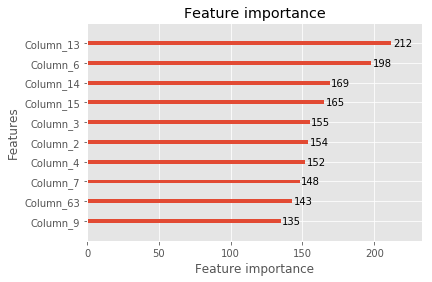

In [181]:
import lightgbm as lgb

ax = lgb.plot_importance(model_lgbm_es, importance_type='split', max_num_features=10)
plt.show()

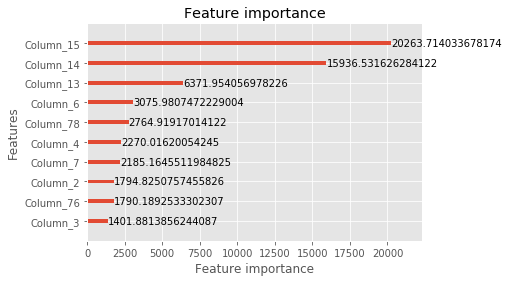

In [182]:
ax = lgb.plot_importance(model_lgbm_es, importance_type='gain', max_num_features=10)
plt.show()

get model importance

In [130]:
booster = model_lgbm_es.booster_

importance = booster.feature_importance(importance_type='gain')

In [208]:
feature_importance = pd.DataFrame({'feature_name':features_full,'importance':importance} )
feature_importance = feature_importance.sort_values(['importance'], ascending=False)

In [209]:
feature_importance.head(10)

,feature_name,importance
15,EXT_SOURCE_3,20263.714034
14,EXT_SOURCE_2,15936.531626
13,EXT_SOURCE_1,6371.954057
6,DAYS_BIRTH,3075.980747
78,past_due_times,2764.919170
4,AMT_GOODS_PRICE,2270.016201
7,DAYS_EMPLOYED,2185.164551
2,AMT_CREDIT,1794.825076
76,utilization_CC,1790.189253
3,AMT_ANNUITY,1401.881386


Plot the feature importance

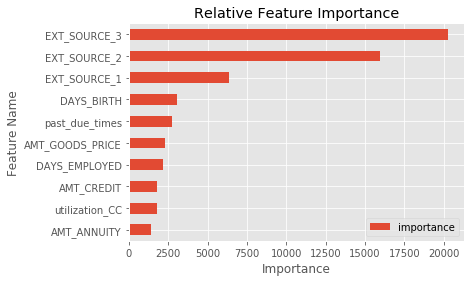

In [216]:
fig, ax = plt.subplots()
feature_importance.head(10).plot.barh(x='feature_name', y='importance', ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_ylabel('Feature Name')
ax.set_title('Relative Feature Importance')
plt.show()

3-fold cross validation for significant testing 

In [119]:
#perform corss-validation to get a series of scores for p-value

from scipy import stats

fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'auc',
            'verbose': False,
            'eval_set': [(test_X,y_test)]}

best_train_scores = cross_val_score(model_lgbm_es, train_X, y_train, 
                                   scoring='roc_auc', cv=30, fit_params=fit_params)

In [120]:
best_train_scores

array([0.76442599, 0.76399866, 0.76257087, 0.76459844, 0.77570011,
       0.76564863, 0.78508369, 0.76405403, 0.76844225, 0.76613153,
       0.7592385 , 0.75605914, 0.75854305, 0.77913457, 0.74739931,
       0.77549347, 0.76339179, 0.77912104, 0.75766653, 0.78302365,
       0.76757681, 0.75480649, 0.75773345, 0.76610374, 0.77175365,
       0.76354919, 0.7569002 , 0.76672163, 0.77138163, 0.77553922])

In [137]:
exp_name = f"LGBM_poly1_early_stopping"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_lgbm_es.predict(train_X)), 
                accuracy_score(y_valid, model_lgbm_es.predict(valid_X)),
                accuracy_score(y_test, model_lgbm_es.predict(test_X)),
                roc_auc_score(y_train, model_lgbm_es.predict_proba(train_X)[:, 1]),
                roc_auc_score(y_valid, model_lgbm_es.predict_proba(valid_X)[:, 1]),
                roc_auc_score(y_test, model_lgbm_es.predict_proba(test_X)[:, 1])],
    4)) 
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_14_features,0.9198,0.9192,0.9159,0.7359,0.7361,0.7362
1,LGBM_poly1_early_stopping,0.9207,0.9197,0.9189,0.8076,0.7661,0.7675
2,LGBM_poly1_early_stopping,0.9206,0.9198,0.9191,0.8063,0.7677,0.7672
3,LGBM_poly1_early_stopping,0.9206,0.9198,0.9191,0.8063,0.7677,0.7672
4,LGBM_poly1_early_stopping,0.9206,0.9198,0.9191,0.8063,0.7677,0.7672


prepare files for Kaggle submission

In [138]:
test_class_scores = model_lgbm_es.predict_proba(Kaggle_test_X)[:, 1]

In [139]:
test_class_scores[0:10]

array([0.02698749, 0.09278481, 0.03969005, 0.03832893, 0.12722543,
       0.06144288, 0.0238604 , 0.05520947, 0.00798334, 0.12854635])

In [140]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.026987
1,100005,0.092785
2,100013,0.039690
3,100028,0.038329
4,100038,0.127225


In [141]:
submit_df.to_csv("submission.csv",index=False)

significance test for best logit modeel and best LightGBM model

In [4]:
from scipy import stats


scores_best_logit = [0.75991906, 0.75122787, 0.74861501, 0.75354972, 0.7414317 ,
       0.76889524, 0.74727686, 0.75408933, 0.75785196, 0.76689399,
       0.74262034, 0.74919817, 0.74069637, 0.75031871, 0.75001898,
       0.73282046, 0.75266586, 0.73769921, 0.75819326, 0.75466185,
       0.74839916, 0.75985089, 0.74118288, 0.76487458, 0.76284237,
       0.75431747, 0.74516205, 0.74562703, 0.7555055 , 0.76827758]

scores_best_lgbm = [0.76442599, 0.76399866, 0.76257087, 0.76459844, 0.77570011,
       0.76564863, 0.78508369, 0.76405403, 0.76844225, 0.76613153,
       0.7592385 , 0.75605914, 0.75854305, 0.77913457, 0.74739931,
       0.77549347, 0.76339179, 0.77912104, 0.75766653, 0.78302365,
       0.76757681, 0.75480649, 0.75773345, 0.76610374, 0.77175365,
       0.76354919, 0.7569002 , 0.76672163, 0.77138163, 0.77553922]

(t_score, p_value) = stats.ttest_rel(scores_best_logit, scores_best_lgbm)
p_value

1.602776962361117e-06

# A Functionized Approach

In [1]:
import gc
from sklearn.externals import joblib
import math
import numpy as np
import os
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, roc_auc_score
from statistics import mean
from sklearn.preprocessing import PolynomialFeatures
import timeit
import uuid

config_file = os.path.join(os.getcwd(), "workingdir.config")
with open(config_file, 'r') as f:
    WORKING_DIR = f.readline()
DATA_DIR = os.path.join(WORKING_DIR, 'Data')
LOG_DIR = os.path.join(WORKING_DIR, 'runs')

def load_data(name):
    in_path = os.path.join(DATA_DIR, f'{name}.csv')
    df = pd.read_csv(in_path)
    return df

def get_datasets(phase):
    datasets = {}
    datasets["application"] = load_data(f"application_{phase}")
    print(f"loaded {len(datasets['application'])} records")
    ds_names = ("bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")
    for ds_name in ds_names:
        datasets[ds_name] = load_data(ds_name)
    return datasets

def features_from_previous_application(X, datasets):
    '''
    creates the no_prev_appl and no_approved_prev_appl columns
    '''
    prev_app = datasets['previous_application']
    no_app_customer = prev_app.loc[(prev_app.DAYS_DECISION >= -365) & 
           (prev_app.NAME_CONTRACT_STATUS != 'Canceled'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
    no_app_customer = no_app_customer.to_frame()
    no_app_customer.reset_index(inplace=True)
    no_app_customer.rename(columns={'SK_ID_PREV':'no_prev_appl'}, inplace=True)
    
    no_approved_app_customer = prev_app.loc[(prev_app.DAYS_DECISION >= -365) & 
           (prev_app.NAME_CONTRACT_STATUS == 'Approved'), ].groupby('SK_ID_CURR').SK_ID_PREV.count().sort_values(ascending=False) # only select the applications in the past 12 months
    no_approved_app_customer = no_approved_app_customer.to_frame()
    no_approved_app_customer.reset_index(inplace=True)
    no_approved_app_customer.rename(columns={'SK_ID_PREV':'no_approved_prev_appl'}, inplace=True)
    
    X = pd.merge(X, no_app_customer, on='SK_ID_CURR', how='left')
    X = pd.merge(X, no_approved_app_customer, on='SK_ID_CURR', how='left')
    X[['no_prev_appl']] = X[['no_prev_appl']].fillna(value=0)
    X[['no_approved_prev_appl']] = X[['no_approved_prev_appl']].fillna(0)
    
    return X

def features_from_bureau(X, datasets):
    '''
    Engineered features:
    - total_creditLimit
    - no_of_loans 
    - ave_creditLimit
    '''
    bureau = datasets['bureau']
    credit_sum = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_CURRENCY == 'currency 1')] \
        .groupby('SK_ID_CURR').AMT_CREDIT_SUM.sum()
    credit_sum = credit_sum.to_frame()
    credit_sum.reset_index(inplace=True)
    
    no_loans = bureau[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.CREDIT_CURRENCY == 'currency 1')] \
        .groupby('SK_ID_CURR').SK_ID_BUREAU.count()
    no_loans = no_loans.to_frame()
    no_loans.reset_index(inplace=True)
    
    bureau_info = pd.merge(credit_sum, no_loans, how='outer', on='SK_ID_CURR')
    bureau_info.rename(columns={'AMT_CREDIT_SUM':'total_creditLimit', 'SK_ID_BUREAU':'no_of_loans'}, inplace=True)
    bureau_info['ave_creditLimit'] = bureau_info.eval('total_creditLimit/no_of_loans')

    X = pd.merge(X, bureau_info, on='SK_ID_CURR', how='left')
    X[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']] = X[['total_creditLimit', 'no_of_loans', 'ave_creditLimit']].fillna(0)

    return X

def features_from_credit_card_balance(X, datasets):
    '''
    Engineered features:
    - utilization_CC
    - payment_ratio_CC
    - total_credit_limit_CC
    '''
    ccb = datasets['credit_card_balance']
    creditCard_info = ccb[(ccb.MONTHS_BALANCE >= -24) & 
                          (ccb.NAME_CONTRACT_STATUS =='Active') &
                          (ccb.AMT_CREDIT_LIMIT_ACTUAL > 0)] \
                    .groupby('SK_ID_CURR')['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_PAYMENT_TOTAL_CURRENT'].sum()
    creditCard_info.reset_index(inplace=True)
    
    creditCard_info['utilization_CC'] = creditCard_info.eval('AMT_BALANCE/AMT_CREDIT_LIMIT_ACTUAL')
    creditCard_info['payment_ratio_CC'] = creditCard_info.eval('AMT_PAYMENT_TOTAL_CURRENT/AMT_BALANCE')
    creditCard_info.loc[creditCard_info.payment_ratio_CC.isnull(), 'payment_ratio_CC'] = 1
    creditCard_info.loc[creditCard_info.payment_ratio_CC > 1, 'payment_ratio_CC'] = 1
    creditCard_info.drop(columns=['AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT'], inplace=True)
    creditCard_info.rename(columns={'AMT_CREDIT_LIMIT_ACTUAL':'total_creditLimit_CC'}, inplace=True)
    
    X = pd.merge(X, creditCard_info, on='SK_ID_CURR', how='left')
    return X # best fillna strategy will be left to grid search

def features_from_installments_payments(X, datasets):
    '''
    Engineered features:
    - past_due_times
    '''
    ip = datasets['installments_payments']
    ip['past_due_times'] = (ip.eval('DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT') > 0).astype(int)
    past_due_info = ip[ip['DAYS_INSTALMENT'] >= -730].groupby('SK_ID_CURR')['past_due_times'].sum() 
    past_due_info = past_due_info.to_frame()
    past_due_info.reset_index(inplace=True)

    X = pd.merge(X, past_due_info, on='SK_ID_CURR', how='left')
    return X

def features_from_application(X):
    '''
    Engineered features:
    - credit_income_ratio
    - annuity_income_ratio
    - REGION_POPULATION_RELATIVE_flag
    '''
    X['credit_income_ratio'] = X.eval('AMT_CREDIT/AMT_INCOME_TOTAL') #credit to income ratio
    X['annuity_income_ratio'] = X.eval('AMT_ANNUITY/AMT_INCOME_TOTAL') #annuity to income ratio
    return X

def build_ratio_features(X):
    # take ratios of all 2-way combo of numerical features
    return X
          
def build_features(datasets):
    print("features from previous application")
    X = features_from_previous_application(datasets['application'], datasets)
    print("features from bureau")
    X = features_from_bureau(X, datasets)
    print("features from credit card balance")
    X = features_from_credit_card_balance(X, datasets)
    print("features from installments")
    X = features_from_installments_payments(X, datasets)
    print("features from application")
    X = features_from_application(X)
    
    #create new features are the ratio of two numerical features
    X = build_ratio_features(X)
          
    return X

          
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
def print_msg(X, **kwargs):
    for key, value in kwargs.items():
        print(value)
    return X

def get_standard_pipeline(cat_attribs, num_attribs, poly_degree=1):  
#     import pdb; pdb.set_trace()
    num_pipeline = Pipeline([
        ('num_selector', DataFrameSelector(num_attribs)),
        ('print_num_1', FunctionTransformer(print_msg, kw_args=dict(msg="num_selector"), validate=False)),
        ('num_imputer', SimpleImputer(strategy='mean')),
        ('print_num_2', FunctionTransformer(print_msg, kw_args=dict(msg="num_imputer"), validate=False)),
        ('std_scaler', StandardScaler()),
        ('print_num_3', FunctionTransformer(print_msg, kw_args=dict(msg="num_scaler"), validate=False)), 
        ('polynomial', PolynomialFeatures(degree=poly_degree)),
        ('print_num_done', FunctionTransformer(print_msg, kw_args=dict(msg="num_done"), validate=False)),       
    ])
#     import pdb; pdb.set_trace()
    cat_pipeline = Pipeline([
        ('cat_selector', DataFrameSelector(cat_attribs)),
        ('print_cat_1', FunctionTransformer(print_msg, kw_args=dict(msg="cat_selector"), validate=False)),
        ('cat_imputer', SimpleImputer(strategy='constant', fill_value = 'N/A')),
        ('print_cat_2', FunctionTransformer(print_msg, kw_args=dict(msg="cat_imputer"), validate=False)),
        ('ohe', OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown="ignore")),
        ('print_cat_done', FunctionTransformer(print_msg, kw_args=dict(msg="cat_done"), validate=False))
    ])
    num_cat_pipeline = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, num_attribs),
            ('cat', cat_pipeline, cat_attribs)],
        n_jobs = -1
    )
#    num_cat_pipeline = FeatureUnion(transformer_list = [
#        ("num_pipe", num_pipeline),
#        ("cat_pipe", cat_pipeline)
#    ],
#    n_jobs = 2
#    )
    return num_cat_pipeline

# default_pipeline = get_standard_pipeline(cat_attribs, num_attribs)

def pre_process(preproc_pipeline, phase = "train"):
    '''
    Performs all feature engineering, data munging, etc. in a standardized way    
    Returns: (transformed) X, Y, (fitted) pipeline. If phase == "test", Y and pipeline will = None
    '''
    datasets = get_datasets(phase)
    
    if phase == "train":
        Y = datasets['application']['TARGET']
    else:
        Y = None
    
    X = build_features(datasets)  

    print("start pipeline")
#     import pdb; pdb.set_trace()
    if phase == "train":
#         import pdb; pdb.set_trace()
        X = preproc_pipeline.fit_transform(X)
    else:
        X = preproc_pipeline.transform(X)
    
    return X, Y, preproc_pipeline

def get_search_class(search_repr):
    return search_repr[:search_repr.find('(')]

def get_clf(search_repr):
    e_string = 'estimator='
    start = search_repr.find(e_string) + len(e_string)
    end = search_repr.find('),', start)
    return search_repr[start:end+1]
    
def get_params(search_repr, is_grid = True):
    if is_grid:
        arg_string = 'param_grid='
    else:
        arg_string = 'param_distributions='
    start = search_repr.find(arg_string) + len(arg_string)
    end = search_repr.find('},', start)
    return search_repr[start:end+1]

def run_test(X, Y, 
             search, 
             test_description, 
             experiment_name, 
             pipeline_named_steps,
             cat_attribs,
             num_attribs,
             testSize = 0.1, 
             **fit_params):
    '''
    Uses grid search to search for best model params
    NOTE: set early stopping on the estimator you pass in!
    Logs results, including best model (pickled), to mlflow
    
    Arguments:
    `X` - training data - will be split into train and test sets
    `Y` - targets
    `search`- an instance of GridSearchCV or RandomizedSearchCV
    `test_description` - description of test run to be logged
    `experiment_name` - name of experiment that this test run is a part of
    `pipeline_named_steps` - to be logged alongside metrics for future reference
    `cat_attribs` - to be logged alongside metrics for future reference
    `num_attribs` - to be logged alongside metrics for future reference
    `testSize` - fraction of training set to hold out for sanity check/test 
    `fit_params` - additional parameters to be passed to the search .fit() function
    '''
    # train/test split 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testSize, random_state=42)
    
    # start log
    search_repr = repr(search)
    search_class = get_search_class(search_repr)
    clf_repr = get_clf(search_repr)
    params = get_params(search_repr)

    run_attribs = []
    run_attribs.append(wrap_in_quotes(experiment_name))   
    run_attribs.append(wrap_in_quotes(test_description))
    run_attribs.append(wrap_in_quotes(str(cat_attribs)))
    run_attribs.append(wrap_in_quotes(str(num_attribs)))
    run_attribs.append(wrap_in_quotes(pipeline_named_steps))
    run_attribs.append(wrap_in_quotes(search_class))
    run_attribs.append(wrap_in_quotes(params))
    
#     import pdb; pdb.set_trace()
    search.fit(X_train, y_train, **fit_params)
    cv_results = search.cv_results_

    # TODO in phase 3: calculate p-value w.r.t. baseline 

    # sanity check with test set
    verification = VerificationTest(search.best_estimator_)
    verification.run(X_test, y_test)

    # log: best params, auc, p-value, array of train loss, array of val loss
    run_attribs.append(wrap_in_quotes(str(search.best_params_)))
    run_attribs.append(format_num(mean(cv_results['mean_fit_time'])))
    run_attribs.append(format_num(search.best_score_))
    run_attribs.append(format_num(verification.test_auc))
    run_attribs.append(format_num(verification.test_accuracy))
    run_attribs.append(format_num(verification.prediction_ms_per_row))
    run_id = str(uuid.uuid4())
    run_attribs.append(wrap_in_quotes(run_id))
    line = ','.join(run_attribs) + '\n'
    
    with open(os.path.join(LOG_DIR, "runs.csv"), 'a') as run_file:
        run_file.write(line)    
        
    # store best model
    model_file = run_id + '.joblib'
    joblib.dump(search.best_estimator_, os.path.join(LOG_DIR, model_file))

class VerificationTest:
    '''
    Runs a verification test against held out test set. Calculates the following metrics,
    which are available as properties:
    * test_auc
    * test_accuracy
    * prediction_ms_per_row
    '''
    def __init__(self, model):
        '''
        `model` = best_estimator_ from search
        `significance_score` = Which metric used for p_value? Choose from ('auc', 'accuracy')
        '''
        self._model = model
        
    def run(self, X_test, y_test):
        '''
        `X_test`
        `y_test`
        '''
        y_hat = self._model.predict(X_test)
        self.test_accuracy = accuracy_score(y_test, y_hat)
        
        y_proba = self._model.predict_proba(X_test)
        self.test_auc = roc_auc_score(y_test, y_proba[:,1])
        
        timing_test = wrapper(self._model.predict, X_test)
        test_execution_time = timeit.timeit(timing_test, setup = gc.enable, number = 1)
        self.prediction_ms_per_row = test_execution_time * 1000000 / len(y_test)
                
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped
        
def wrap_in_quotes(s):
    s = s.replace('"', '').replace('\n', '').replace('\r', '')
    return '"' + s + '"'

def format_num(n):
    return str(round(n, 5))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\stefanie\\Documents\\IU\\Spring2019\\I526\\I526_AML_SP19\\Final project\\workingdir.config'

## a small example test case

In [ ]:
%%time

NUMERIC_COLS = ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'no_prev_appl', 'no_approved_prev_appl','utilization_CC',
               'past_due_times', 'OWN_CAR_AGE', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
               'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','credit_income_ratio', 'annuity_income_ratio']
CATEGORY_COLS = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE',
              'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
              'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']

default_pipeline = get_standard_pipeline(cat_attribs=CATEGORY_COLS, num_attribs=NUMERIC_COLS)

X, Y, pipe = pre_process(phase = "train", preproc_pipeline = default_pipeline)

In [9]:
%%time

from sklearn.linear_model import LogisticRegression
import time

clf = LogisticRegression(penalty = 'l1', solver = 'saga', tol = 0.001, C = 1000)
grid = {'penalty':['l1','l2'], 'C':[100,10,1]}
search = GridSearchCV(
    estimator = clf,
    param_grid = grid,
    scoring = 'roc_auc', 
    n_jobs = -1, 
    cv = 4)

# log arguments
pipe_steps = repr(pipe.transformers_)
description = "benchmark LogReg with engineered features"
experiment = "LogReg"

start_time = time.time()
run_test(X, Y, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS,
        num_attribs=NUMERIC_COLS)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.0827078819274902 seconds
Wall time: 2.08 s


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Logistic Regression using all features

In [1]:
# select numerica and categorical features

NUMERIC_COLS_logit = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'no_prev_appl',
 'no_approved_prev_appl',
 'total_creditLimit',
 'no_of_loans',
 'ave_creditLimit',
 'total_creditLimit_CC',
 'utilization_CC',
 'payment_ratio_CC',
 'past_due_times',
 'credit_income_ratio',
 'annuity_income_ratio']

CATEGORY_COLS_logit = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

## full features with polynomial degree = 1 for numerical features

In [15]:
%%time

logit_full_poly1_pipeline = get_standard_pipeline(cat_attribs=CATEGORY_COLS_logit, num_attribs=NUMERIC_COLS_logit)

X, Y, pipe = pre_process(phase = "train", preproc_pipeline = logit_full_poly1_pipeline)

loaded 307511 records
features from previous application
features from bureau
features from credit card balance
features from installments
features from application
start pipeline
Wall time: 1min 17s


In [16]:
%%time

from sklearn.linear_model import LogisticRegression
import time

clf = LogisticRegression(tol = 0.001)
grid_params = {'penalty': ('l1', 'l2'),
    'C': (100, 10, 1, 0.1, 0.01),
     }
search = GridSearchCV(
    estimator = clf,
    param_grid = grid_params,
    scoring = 'roc_auc', 
    n_jobs = 2, 
    cv = 5,
    verbose=10)

# log arguments
pipe_steps = repr(pipe.transformers_)
description = "LogReg with full features poly degree = 1"
experiment = "LogReg_full_features_poly1"

start_time = time.time()
run_test(X, Y, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS_logit,
        num_attribs=NUMERIC_COLS_logit)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   58.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 13.3min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 15.9min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 19.3min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 21.0min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 21.5min finished
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Elapsed time: 1408.5411756038666 seconds
Wall time: 23min 28s


## full features with polynomial degree = 2 and pca() for numerical features

In [2]:
# for a number of features I only select the median and not mode or average because of memory error

NUMERIC_COLS_logit = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'no_prev_appl',
 'no_approved_prev_appl',
 'total_creditLimit',
 'no_of_loans',
 'ave_creditLimit',
 'total_creditLimit_CC',
 'utilization_CC',
 'payment_ratio_CC',
 'past_due_times',
 'credit_income_ratio',
 'annuity_income_ratio']


CATEGORY_COLS_logit = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [3]:
%%time

# create train data
logit_full_poly2_pipeline = get_standard_pipeline(cat_attribs=CATEGORY_COLS_logit, num_attribs=NUMERIC_COLS_logit, poly_degree=2)
X, Y, pipe = pre_process(phase = "train", preproc_pipeline = logit_full_poly2_pipeline)

loaded 307511 records
features from previous application
features from bureau
features from credit card balance
features from installments
features from application
start pipeline
Wall time: 2min 3s


In [6]:
%%time

from sklearn.linear_model import LogisticRegression
import time
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#make a cache for memory
cachedir = mkdtemp()

estimators = [('pca', PCA()),
             ('clf', LogisticRegression(tol = 0.001, n_jobs=2))]
pipeline =Pipeline(estimators, memory=cachedir)

grid_params = {'pca__n_components':(100, 200, 300, 400),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (1, 0.1, 0.01, 0.001, 0.0001),
     }
search = GridSearchCV(
    estimator = pipeline,
    param_grid = grid_params,
    scoring = 'roc_auc',  
    cv = 5,
    verbose=10)

# log arguments
pipe_steps = repr(pipe.transformers_)
description = "LogReg with full features pca poly degree = 2"
experiment = "LogReg_full_features_poly2_pca"

start_time = time.time()
run_test(X, Y, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS_logit,
        num_attribs=NUMERIC_COLS_logit)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")




Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1, clf__penalty=l1, pca__n_components=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 16.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effec

[CV]  clf__C=1, clf__penalty=l1, pca__n_components=100, score=0.6525467975997179, total= 2.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=100, score=0.6548905718213958, total= 1.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=100, score=0.644430342311002, total=  58.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.4min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=100, score=0.6421079675301269, total= 1.0min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=100 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.5min remaining:    0.0s
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.36s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effecti

[CV]  clf__C=1, clf__penalty=l1, pca__n_components=100, score=0.654172122676788, total=  56.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.5min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=200, score=0.6934760268122461, total= 1.3min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.9min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=200, score=0.6964838780948602, total= 1.2min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.2min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=200, score=0.6872198001001222, total= 1.3min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.6min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.39s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=200, score=0.6902385156850959, total= 1.2min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.9min remaining:    0.0s


[CV] clf__C=1, clf__penalty=l1, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=200, score=0.6961195583002735, total= 1.2min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=300, score=0.7052978936419786, total= 1.6min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=300, score=0.7109867769439817, total= 1.7min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=300, score=0.7029680257198035, total= 1.6min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 7.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=300, score=0.7053925268089474, total= 2.2min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 5.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=300, score=0.7082938225477555, total= 1.7min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 5.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=400, score=0.7149181725092294, total= 2.8min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 5.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=400, score=0.7187934455657656, total= 2.4min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=400, score=0.714860028631856, total= 2.2min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=400, score=0.714954861523611, total= 2.4min
[CV] clf__C=1, clf__penalty=l1, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 4.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l1, pca__n_components=400, score=0.7191976188560062, total= 2.3min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=100, score=0.6525499903684078, total=  23.6s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=100, score=0.6548911003981235, total=  26.6s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=100, score=0.6444339057991082, total=  26.7s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=100, score=0.6421042321811852, total=  24.1s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=100 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=100, score=0.654171717426667, total=  23.0s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=200, score=0.6934747937429591, total=  34.9s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=200, score=0.6964802661538874, total=  43.9s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=200, score=0.6872173422183381, total=  44.8s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=200, score=0.6902419647160172, total=  50.7s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=200 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=200, score=0.6961200736727101, total=  38.3s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=300, score=0.7052960176151347, total= 1.1min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=300, score=0.7109827553560448, total= 1.0min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=300, score=0.7029693515664289, total= 1.1min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=300, score=0.7053879325059448, total= 1.1min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=300 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=300, score=0.7082912500904655, total=  56.7s
[CV] clf__C=1, clf__penalty=l2, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=400, score=0.7149148300106974, total= 1.1min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=400, score=0.7187789845874559, total= 1.4min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=400, score=0.7148638740275504, total= 1.3min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=400, score=0.7149573635026191, total= 1.3min
[CV] clf__C=1, clf__penalty=l2, pca__n_components=400 ................


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=1, clf__penalty=l2, pca__n_components=400, score=0.7191945662654206, total= 1.2min
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=100, score=0.65250462222628, total=  10.4s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=100, score=0.6548867088064773, total=  12.0s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=100, score=0.6444133177355628, total=  10.9s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=100, score=0.6420921759900844, total=  12.3s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=100, score=0.6541688850807124, total=  10.6s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=200, score=0.693489942879915, total=  20.3s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=200, score=0.6965338902629168, total=  18.2s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=200, score=0.6872365515775856, total=  16.2s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=200, score=0.6902082012140853, total=  20.8s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=200, score=0.6961032469829018, total=  16.5s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=300, score=0.7052986995408341, total=  22.1s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=300, score=0.7110257330488162, total=  26.5s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=300, score=0.7029566437009328, total=  25.1s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=300, score=0.7054181897133511, total=  32.9s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=300, score=0.7083308765044746, total=  23.1s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=400, score=0.7149461984125975, total=  34.8s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=400, score=0.7189506707134325, total=  39.2s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=400, score=0.7148650413011576, total=  28.6s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=400, score=0.7149117948884657, total=  39.5s
[CV] clf__C=0.1, clf__penalty=l1, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l1, pca__n_components=400, score=0.7192299067189105, total=  32.1s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=100, score=0.6525414909979645, total=  23.5s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=100, score=0.6548839822315233, total=  28.1s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=100, score=0.6444245411814151, total=  28.7s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=100 ..............

C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=100, score=0.6420977966330675, total=  28.1s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=100 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=100, score=0.6541635287312866, total=  24.8s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=200, score=0.6934741639968588, total=  37.1s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=200, score=0.6964794556695714, total=  47.6s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=200, score=0.6872138007542623, total=  44.2s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=200, score=0.6902431055832059, total=  53.5s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=200 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=200, score=0.6961183469548029, total=  37.4s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=300, score=0.7052948506031307, total=  53.6s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=300, score=0.7109861206278782, total=  58.5s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=300, score=0.7029675588103607, total= 1.1min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=300, score=0.705389390525402, total= 1.1min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=300 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=300, score=0.708291069489868, total=  55.3s
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=400, score=0.7149157592164816, total= 1.0min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=400, score=0.7187914369742002, total= 1.5min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=400, score=0.714863711049726, total= 1.3min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=400, score=0.7149586144921232, total= 1.2min
[CV] clf__C=0.1, clf__penalty=l2, pca__n_components=400 ..............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.1, clf__penalty=l2, pca__n_components=400, score=0.7191960154750925, total= 1.1min
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=100, score=0.6519723282341309, total=  10.1s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=100, score=0.6548316707547011, total=  10.7s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=100, score=0.6442576386748244, total=  11.1s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=100, score=0.6419673589528055, total=  11.7s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=100, score=0.6541389097864336, total=   9.6s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=200, score=0.693472164663086, total=  18.8s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=200, score=0.69700493581865, total=  16.5s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=200, score=0.687176029542259, total=  16.7s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=200, score=0.6898163067274735, total=  17.1s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=200, score=0.6959382176808954, total=  13.9s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=300, score=0.7049358600954655, total=  18.5s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=300, score=0.7111711577210363, total=  20.1s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=300, score=0.702621975345763, total=  18.4s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=300, score=0.7051102128360421, total=  27.9s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=300, score=0.7081706793696723, total=  20.2s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=400, score=0.7145425752005581, total=  25.7s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=400, score=0.7196111581683884, total=  22.4s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=400, score=0.7140856505112961, total=  25.6s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=400, score=0.713802911625212, total=  34.5s
[CV] clf__C=0.01, clf__penalty=l1, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l1, pca__n_components=400, score=0.7187826559467437, total=  25.1s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=100, score=0.6524530843338978, total=  21.1s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=100, score=0.6548180995472164, total=  24.9s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=100, score=0.6443290846291909, total=  25.3s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=100, score=0.6420444665981179, total=  24.4s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=100 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=100, score=0.6540799238693599, total=  21.9s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=200, score=0.693468985105853, total=  34.4s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=200, score=0.6964815655716764, total=  45.1s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=200, score=0.6871828966349136, total=  41.9s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=200, score=0.6902427708113668, total=  49.9s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=200 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=200, score=0.6960989874517384, total=  36.4s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=300, score=0.7052796398127105, total=  51.9s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=300, score=0.711027279135745, total=  57.5s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=300, score=0.7029564851279146, total= 1.1min
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=300, score=0.7053968524135, total= 1.2min
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=300 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=300, score=0.7082865016162212, total=  52.6s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=400, score=0.7149227392694105, total=  58.6s
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=400 .............

C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=400, score=0.7188977293493432, total= 1.3min
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=400, score=0.7148906948916773, total= 1.2min
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=400, score=0.7149764719268044, total= 1.2min
[CV] clf__C=0.01, clf__penalty=l2, pca__n_components=400 .............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.01, clf__penalty=l2, pca__n_components=400, score=0.7192080804759785, total= 1.1min
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=100, score=0.6460978011899665, total=   9.0s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=100 ............

C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=100, score=0.6528978375578088, total=   9.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=100, score=0.6413078017207032, total=   9.1s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=100, score=0.6364684363675159, total=   9.1s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=100, score=0.6503886150440561, total=   8.9s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=200, score=0.6854505997609378, total=  11.1s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=200, score=0.6917231901291678, total=  11.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=200, score=0.6769176150313232, total=  10.7s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=200, score=0.6776274182364933, total=  12.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=200, score=0.6878235289013154, total=  10.7s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=300, score=0.6914524324013582, total=  13.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=300, score=0.7001046286798923, total=  13.6s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=300, score=0.6880255888927281, total=  13.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=300, score=0.6857322708908529, total=  14.5s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=300, score=0.6926846935135181, total=  12.2s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=400, score=0.6921692684237792, total=  14.2s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=400, score=0.7009841142827637, total=  16.2s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=400, score=0.6900354270182638, total=  15.2s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=400, score=0.6878980684942302, total=  16.4s
[CV] clf__C=0.001, clf__penalty=l1, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l1, pca__n_components=400, score=0.6909490248646938, total=  14.7s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=100, score=0.651633934387379, total=  23.7s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=100, score=0.654244492487077, total=  24.9s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=100, score=0.6435098876069243, total=  25.1s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=100, score=0.6416512418339347, total=  30.8s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=100 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=100, score=0.6533207846752377, total=  21.1s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=200, score=0.6932309939258038, total=  32.8s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=200, score=0.6964416095758652, total=  38.6s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=200, score=0.6868955182776524, total=  39.8s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=200, score=0.6901051223218859, total=  38.0s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=200 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=200, score=0.695819814167271, total=  31.6s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=300, score=0.7050826173597255, total=  45.2s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=300, score=0.7113081295704184, total=  54.4s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=300, score=0.7027528817771945, total=  55.6s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=300, score=0.705295971562718, total= 1.0min
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=300 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=300, score=0.7081021392405058, total=  44.6s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=400, score=0.7148149602060797, total=  54.3s
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=400, score=0.7196120391296014, total= 1.1min
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=400, score=0.7150017708862061, total= 1.2min
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=400, score=0.7149083722869, total= 1.2min
[CV] clf__C=0.001, clf__penalty=l2, pca__n_components=400 ............


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.001, clf__penalty=l2, pca__n_components=400, score=0.7191727576420591, total=  57.2s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=100, score=0.5752401571983665, total=   8.1s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=100, score=0.5765877175216019, total=   8.4s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=100, score=0.5612704669368846, total=   8.1s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=100, score=0.5885645331525213, total=   8.3s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=100, score=0.5766449157473986, total=   8.3s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=200, score=0.5752385189777423, total=   9.5s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=200, score=0.5765917699431812, total=   9.6s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=200, score=0.5612723389794623, total=   9.6s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=200, score=0.5885360511168407, total=   9.5s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=200, score=0.5766449774158953, total=   9.4s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=300, score=0.5752384749395534, total=  11.1s


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=300 ...........
[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=300, score=0.5765899551630826, total=  11.0s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=300, score=0.5612734622050086, total=  11.0s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=300, score=0.5885505916673792, total=  11.2s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=300, score=0.576645594100862, total=  11.4s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=400, score=0.5752388580717962, total=  12.5s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=400, score=0.5765903031427616, total=  12.6s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=400, score=0.5612699780034116, total=  12.4s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=400, score=0.5885544899973477, total=  12.2s
[CV] clf__C=0.0001, clf__penalty=l1, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l1, pca__n_components=400, score=0.5766454267149426, total=  12.8s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=100, score=0.6481680056199071, total=  24.3s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=100, score=0.65114749096234, total=  20.5s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=100, score=0.6402480890728958, total=  20.1s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=100, score=0.6394307662984661, total=  22.4s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=100 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=100, score=0.6498624902646366, total=  26.2s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=200, score=0.6909325747937333, total=  26.7s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=200, score=0.6944153767621576, total=  27.6s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=200, score=0.6850123667793385, total=  32.0s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=200, score=0.6881313868465236, total=  31.6s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=200 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=200, score=0.6937356260094637, total=  26.4s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=300, score=0.7031202888771311, total=  46.3s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=300, score=0.710008412254574, total=  41.0s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=300, score=0.7010164103208288, total=  35.2s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=300, score=0.7030280949777661, total=  40.8s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=300 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=300, score=0.7059913191019181, total=  37.8s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=400, score=0.712872136237316, total=  42.0s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=400, score=0.718865631527551, total=  44.4s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=400, score=0.7134282155869428, total=  52.6s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=400, score=0.7126488782126038, total=  48.5s
[CV] clf__C=0.0001, clf__penalty=l2, pca__n_components=400 ...........


C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  clf__C=0.0001, clf__penalty=l2, pca__n_components=400, score=0.7171360938707283, total=  54.8s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 152.2min finished
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 5.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stefanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs

Elapsed time: 9344.747162342072 seconds
Wall time: 2h 35min 44s


unfortunately, the pac() method doesn't have very good performance

# lightgbm() with early stopping

## use full featues with poly degree = 1

In [3]:
# select numerica and categorical features

NUMERIC_COLS_lgbm = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'no_prev_appl',
 'no_approved_prev_appl',
 'total_creditLimit',
 'no_of_loans',
 'ave_creditLimit',
 'total_creditLimit_CC',
 'utilization_CC',
 'payment_ratio_CC',
 'past_due_times',
 'credit_income_ratio',
 'annuity_income_ratio']

CATEGORY_COLS_lgbm = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [4]:
%%time

lgbm_pipeline = get_standard_pipeline(cat_attribs=CATEGORY_COLS_lgbm, num_attribs=NUMERIC_COLS_lgbm)

X, Y, pipe = pre_process(phase = "train", preproc_pipeline = lgbm_pipeline)

loaded 307511 records
features from previous application
features from bureau
features from credit card balance
features from installments
features from application
start pipeline
Wall time: 1min 13s


In [5]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.15, random_state=42)

grid_params ={'max_depth': sp_randint(4, 12),
             'num_leaves': sp_randint(10, 50), 
             'min_child_samples': sp_randint(20, 100), 
             'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
             'learning_rate': sp_uniform(loc=0.01, scale=0.14),
             'subsample': sp_uniform(loc=0.2, scale=0.8),
             'bagging_fraction': sp_uniform(loc=0.4, scale=0.6),
             'feature_fraction': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': sp_randint(0, 50),
             'reg_lambda': sp_randint(0, 50)}

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_valid,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [7]:
%%time

from lightgbm import LGBMClassifier
import time



clf = LGBMClassifier()
search = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=grid_params, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

# log arguments
pipe_steps = repr(pipe.transformers_)
description = "lightweight GB with full features poly degree = 1"
experiment = "Lgbm_full_features_poly1"

start_time = time.time()
run_test(X_train, y_train, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS_lgbm,
        num_attribs=NUMERIC_COLS_lgbm, **fit_params)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.244642	valid's auc: 0.761839
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.244642	valid's auc: 0.761839
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.244861	valid's auc: 0.761195
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.244861	valid's auc: 0.761195
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.244598	valid's auc: 0.762061
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.244598	valid's auc: 0.762061
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.244784	valid's auc: 0.761545
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.244784	valid's auc: 0.761545
Training until validation scores don't improve for 10 rounds.
[100]	vali

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 67.8min finished


Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242128	valid's auc: 0.77025
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.242128	valid's auc: 0.77025
Elapsed time: 4077.7178342342377 seconds
Wall time: 1h 7min 57s


narrow down the search area based on previous randomized searh

In [8]:
grid_params ={'max_depth': sp_randint(8, 14),
             'num_leaves': sp_randint(30, 60), 
             'min_child_samples': sp_randint(20, 40), 
             'min_child_weight': [1e-5, 1e-4, 1e-3, 1e-2],
             'learning_rate': sp_uniform(loc=0.1, scale=0.05),
             'subsample': sp_uniform(loc=0.7, scale=0.3),
             'bagging_fraction': sp_uniform(loc=0.7, scale=0.25),
             'feature_fraction': sp_uniform(loc=0.6, scale=0.3),
             'reg_alpha': sp_randint(8, 20),
             'reg_lambda': sp_randint(20, 40)}

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_valid,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [9]:
%%time

from lightgbm import LGBMClassifier
import time

clf = LGBMClassifier(n_jobs=2)
search = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=grid_params, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

# log arguments
pipe_steps = repr(pipe.transformers_)
description = "lightweight GB with full features poly degree = 1 narrowed area"
experiment = "Lgbm_full_features_poly1_smaller_area"

start_time = time.time()
run_test(X_train, y_train, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS_lgbm,
        num_attribs=NUMERIC_COLS_lgbm, **fit_params)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242687	valid's auc: 0.767987
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.242687	valid's auc: 0.767987
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242879	valid's auc: 0.767952
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.242879	valid's auc: 0.767952
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242854	valid's auc: 0.767657
Did not meet early stopping. Best iteration is:
[97]	valid's binary_logloss: 0.242818	valid's auc: 0.767748
Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242706	valid's auc: 0.768648
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.242706	valid's auc: 0.768648
Training until validation scores don't improve for 10 rounds.
[100]	valid

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 118.6min finished


Training until validation scores don't improve for 10 rounds.
[100]	valid's binary_logloss: 0.242525	valid's auc: 0.767915
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.242525	valid's auc: 0.767915
Elapsed time: 7130.172663927078 seconds
Wall time: 1h 58min 50s


it doesn't improve the performance of the model from the search with narrowed area

## full features with poly degree=1 and pca() feature reduction
we will try using principle component analysis to perform feature reduction after polynomial=1 transformation to reduce the total no. of features

In [37]:
# select numerica and categorical features

NUMERIC_COLS_lgbm = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'no_prev_appl',
 'no_approved_prev_appl',
 'total_creditLimit',
 'no_of_loans',
 'ave_creditLimit',
 'total_creditLimit_CC',
 'utilization_CC',
 'payment_ratio_CC',
 'past_due_times',
 'credit_income_ratio',
 'annuity_income_ratio']

CATEGORY_COLS_lgbm = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [38]:
%%time

# create train data
lgbm_full_poly1_pca_pipeline = get_standard_pipeline(cat_attribs=CATEGORY_COLS_lgbm, num_attribs=NUMERIC_COLS_lgbm, poly_degree=1)
X, Y, pipe = pre_process(phase = "train", preproc_pipeline = lgbm_full_poly1_pca_pipeline)

loaded 307511 records
features from previous application
features from bureau
features from credit card balance
features from installments
features from application
start pipeline
Wall time: 1min 19s


In [44]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.15, random_state=42)

grid_params ={'max_depth': sp_randint(4, 12),
             'num_leaves': sp_randint(10, 50), 
             'min_child_samples': sp_randint(20, 100), 
             'min_child_weight': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2], # a little different
             'learning_rate': sp_uniform(loc=0.01, scale=0.14),
             'subsample': sp_uniform(loc=0.2, scale=0.8),
             'bagging_fraction': sp_uniform(loc=0.4, scale=0.6),
             'feature_fraction': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': sp_randint(0, 50),
             'reg_lambda': sp_randint(0, 50)}

In [55]:
%%time

from lightgbm import LGBMClassifier
import time
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA

#make a cache for memory
cachedir = mkdtemp()

for k in [50, 100, 150]:
    
    print("starting pca n={}".format(k))
    pca = PCA(n_components=k)
    
    X_train_ = pca.fit_transform(X_train)
    X_valid_ = pca.transform(X_valid)
    
    fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_valid_,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}
    
    clf = LGBMClassifier(n_jobs=2)
    search = RandomizedSearchCV(
        estimator=clf, 
        param_distributions=grid_params, 
        n_iter=100,
        scoring='roc_auc',
        cv=5,
        refit=True,
        random_state=42,
        verbose=True)

    # log arguments
    pipe_steps = repr(pipe.transformers_)
    description = "lgbm full features poly degree=1 pca_n=" + str(k) 
    experiment = "Lgbm_full_features_poly1_pca_" + str(k)

    start_time = time.time()
    run_test(X_train_, y_train, search, description, experiment, pipe_steps, cat_attribs=CATEGORY_COLS_lgbm,
            num_attribs=NUMERIC_COLS_lgbm, **fit_params)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("finishing pca n={}".format(k))
    print(f"Elapsed time: {elapsed_time} seconds")

starting pca n=50
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.743174	valid's binary_logloss: 0.250144
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.743174	valid's binary_logloss: 0.250144
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.741739	valid's binary_logloss: 0.250357
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.741739	valid's binary_logloss: 0.250357
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.743432	valid's binary_logloss: 0.25022
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.743432	valid's binary_logloss: 0.25022
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.744312	valid's binary_logloss: 0.249971
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.744312	valid's binary_logloss: 0.249971
Training until validation scores don't improve for 10 rounds.
[100]	valid'

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 51.2min finished


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.745557	valid's binary_logloss: 0.249369
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.745557	valid's binary_logloss: 0.249369
finishing pca n=50
Elapsed time: 3080.212977409363 seconds
starting pca n=100
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.746993	valid's binary_logloss: 0.249043
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.746993	valid's binary_logloss: 0.249043
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.746147	valid's binary_logloss: 0.249449
Did not meet early stopping. Best iteration is:
[99]	valid's auc: 0.746194	valid's binary_logloss: 0.249444
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.746321	valid's binary_logloss: 0.249318
Did not meet early stopping. Best iteration is:
[95]	valid's auc: 0.746405	valid's binary_logloss: 0.249349
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.747138	valid's binary_logloss: 0.249107
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.747138	valid's binary_logloss: 0.249107
Training until validation scores don't improve for 10 rounds.
[100]	valid'

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 80.4min finished


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.747298	valid's binary_logloss: 0.249016
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.747298	valid's binary_logloss: 0.249016
finishing pca n=100
Elapsed time: 4834.717962503433 seconds
starting pca n=150
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.748679	valid's binary_logloss: 0.248457
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.748679	valid's binary_logloss: 0.248457
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.747539	valid's binary_logloss: 0.248907
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.747539	valid's binary_logloss: 0.248907
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.749257	valid's binary_logloss: 0.24852
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.749257	valid's binary_logloss: 0.24852
Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.749704	valid's binary_logloss: 0.248404
Did not meet early stopping. Best iteration is:
[100]	valid's auc: 0.749704	valid's binary_logloss: 0.248404
Training until validation scores don't improve for 10 rounds.
[100]	valid'

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 111.8min finished


Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.751782	valid's binary_logloss: 0.247689
Did not meet early stopping. Best iteration is:
[96]	valid's auc: 0.751789	valid's binary_logloss: 0.247751
finishing pca n=150
Elapsed time: 6722.860311508179 seconds
Wall time: 4h 4min 32s


In [7]:
# Clear the cache directory after job is done
rmtree(cachedir)

unfortunately, the pac() doesn't have any better result

# Kaggle submission via the command line API

In [142]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

Successfully submitted to Home Credit Default Risk



  0%|          | 0.00/1.31M [00:00<?, ?B/s]
  1%|          | 8.00k/1.31M [00:00<00:23, 58.4kB/s]
 13%|#3        | 176k/1.31M [00:00<00:14, 82.1kB/s] 
 29%|##9       | 392k/1.31M [00:00<00:08, 115kB/s] 
 54%|#####4    | 728k/1.31M [00:00<00:03, 158kB/s]
 69%|######9   | 928k/1.31M [00:00<00:01, 218kB/s]
 79%|#######8  | 1.03M/1.31M [00:01<00:01, 196kB/s]
 86%|########5 | 1.12M/1.31M [00:01<00:00, 240kB/s]
 92%|#########1| 1.20M/1.31M [00:01<00:00, 297kB/s]
 98%|#########7| 1.28M/1.31M [00:02<00:00, 356kB/s]
100%|##########| 1.31M/1.31M [00:04<00:00, 335kB/s]


## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

![image.png](attachment:image.png)

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)
